In [1]:
%matplotlib  inline

import os
import re
import roman
import requests as r
import random as rand
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

Get card link list 
-----------------

In [2]:
interp_url = "https://www.trustedtarot.com"

In [3]:
resp = r.get(interp_url + "/cards/")
soup = BeautifulSoup(resp.text, "lxml")
links = soup.find_all("a") # get all links on page

In [4]:
links = [x['href'] for x in links] # get all URLs
links = [interp_url + x for x in links if re.search(r'/cards/[a-z-]*/', x) != None] # get all URLs about tarot cards

In [5]:
# links

In [6]:
nos = { 'ace': '01', 'two': '02', 'three': '03', 'four': '04', 'five': '05',
       'six': '06', 'seven': '07', 'eight': '08', 'nine': '09', 'ten': '10',
       'page': '11', 'knight': '12', 'queen': '13', 'king': '14'}  

Get card
-------------

In [1039]:
card_no = str(int(rand.uniform(1, 78)))
card_no

'56'

In [1040]:
# clear & shuffle
resp = r.get("https://serennu.com/tarot/pick.php?nc=0&deck=")

In [1041]:
resp = r.get("https://serennu.com/tarot/pick.php?nc=" + card_no)

In [1042]:
soup = BeautifulSoup(resp.text, "lxml")

In [1043]:
t = soup.find_all("table")
ser_name = t[1].find_all("font")[3].text
ser_name

'Two of Wands'

In [1044]:
def get_tt_name(card_name):
    '''transform serennu.com name in 
    trustedtarot.com name'''
    card_number = card_name.split()[-1]
    new_cn = card_name[:]
    try:
        roman.fromRoman(card_number) # found roman number
        new_cn = " ".join(card_name.split()[:-1]) # eliminate roman number
    except:
        print("ok")

    new_cn = "-".join([x.lower() for x in new_cn.split()])
    return new_cn

def get_img_name(card_name):
    '''get name of local image file'''
    filename = "" 
    if "of" in card_name.split() and "Wheel" not in card_name: # minor
        no = card_name.split()[0].lower()
        suit = card_name.split()[-1]
        if suit == "Pentacles":
            filename +="Pents"
        else:
            filename += suit
        filename += nos[no]
    else: # major
        filename += "RWS_Tarot_"
        no = card_name.split()[-1]
        try:
            no = roman.fromRoman(no) # found roman number
        except:
            print("no roman numeral")
        if len(card_name.split()) > 2 and "Wheel" not in card_name:
            new_cn = " ".join(card_name.split()[1:-1]) # eliminate the and roman number
        else:
            new_cn = " ".join(card_name.split()[:-1])
        if int(no) < 10:
            filename += "0"
        filename += str(no) + "_" + "_".join(new_cn.split())
    return filename + ".jpg"

In [1045]:
card_name = get_tt_name(ser_name)
img_name = get_img_name(ser_name)
card_name, img_name

ok


('two-of-wands', 'Wands02.jpg')

Get interpretation
------------

In [1046]:
# card_name = "the-fool"
int_url = [x for x in links if card_name in x][0]

In [1047]:
resp = r.get(int_url)

In [1048]:
soup = BeautifulSoup(resp.text, "lxml")

In [1049]:
idx_start = soup.text.find("Yes / No Key Interpretation")
idx_end = soup.text.find("Key Dates")

In [1053]:
print(soup.text)






Two of Wands Tarot Card Meaning







(function(h,o,t,j,a,r){
h.hj=h.hj||function(){(h.hj.q=h.hj.q||[]).push(arguments)};
h._hjSettings={hjid:20377,hjsv:6};
a=o.getElementsByTagName('head')[0];
r=o.createElement('script');r.async=1;
r.src=t+h._hjSettings.hjid+j+h._hjSettings.hjsv;
a.appendChild(r);
})(window,document,'https://static.hotjar.com/c/hotjar-','.js?sv=');




(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'//www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-PSDCQR');








Free Tarot Reading




Menu 

Tarot Card Meanings
Tarot Cards
Love Tarot
Daily Tarot Reading
Tarot Horoscope
Biorhythms
I Ching
Runes
Spirit Guides
Tarot App


Live Tarot Reading


Log in 














			(adsbygoogle = window.adsbygoogle || []).push({});
			
Two of Wands
Achi

In [1051]:
soup.text[idx_start:idx_end].split(".")[:-1]

['Yes / No Key Interpretation\nThe Two of Wands shows being in control and experiencing gains in your life on one hand',
 ' On the other, it brings with it great anxiety and the possibility of losing the control that you once had',
 ' The dynamism projected through this card does not provide a clear answer',
 ' Maybe is what it suggests']

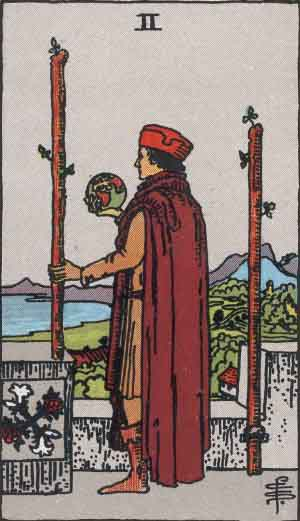

In [1052]:
PATH = os.getcwd() + "/cards/"
Image(filename = PATH + img_name, width=200)